## SVM Chanllenge

This time we're going to look at recipes from Epicurious dataset.

### What we want to see is if we can use the ingredient and keyword list to predict the rating. 

First let's load the dataset. It's available on [Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.


First they(Thinkful) tried SVR with poor results.

### My objective is:

<i>
...    Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

<b>And that is your challenge.</b>

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate might just be happier people.</i>

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epicurious-recipes-with-rating-and-nutrition\epi_r.csv')

In [3]:
raw_data.head(30)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. 

What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

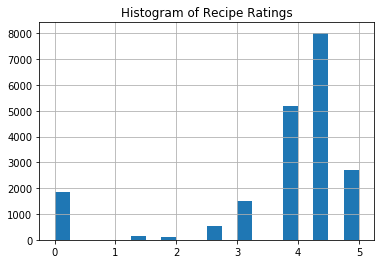

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. 

Also we see the anticipated increase at 0

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
# Let's have a look at how data is distributed:

# pd.set_option('float_format', '{:f}'.format) #or
pd.options.display.float_format = "{:.1f}".format 
raw_data[['calories','protein','fat','sodium']].describe()

,calories,protein,fat,sodium
count,15935.0,15890.0,15869.0,15933.0
mean,6323.0,100.2,346.9,6226.0
std,359046.0,3840.3,20456.1,333318.2
min,0.0,0.0,0.0,0.0
25%,198.0,3.0,7.0,80.0
50%,331.0,8.0,17.0,294.0
75%,586.0,27.0,33.0,711.0
max,30111218.0,236489.0,1722763.0,27675110.0


<i>[Comment > Link: format data with number of decimals(up)^^^](https://stackoverflow.com/questions/41328633/how-do-i-print-entire-number-in-python-from-describe-function?answertab=votes#tab-top)</i>

There are some big outliers that are dragging the mean to the right and creating a very high `std`.

The median(50 percintile) is far from the mean: skewed distributions.

In [8]:
# Count zeros per column 
# Replace `na` with zero to count irrelevant data:
zero_count = ( raw_data.fillna(0)==0 ).sum(axis=0)
zero_count.sort_values( ascending=True )

title                    0
rating                1836
calories              4130
sodium                4180
protein               5013
fat                   5406
bon appétit          10697
peanut free          11662
soy free             11964
tree nut free        13008
vegetarian           13206
gourmet              13404
kosher               13877
pescatarian          14010
quick & easy         14680
wheat/gluten-free    15146
bake                 15639
summer               15901
dessert              16479
dairy free           16846
side                 16901
no sugar added       16920
winter               16953
fall                 17037
dinner               17347
sugar conscious      17586
healthy              17701
kidney friendly      17739
onion                17814
tomato               17912
                     ...  
cr��me de cacao      20051
egypt                20051
dorie greenspan      20051
london               20051
fritter              20051
jamaica              20051
p

Because the data is anlyzed by row(recipe), having a lot of zeros or na's over the column just means that we could remove those column without any loss of value. We'll do that later in a scientific way.

In [9]:
# Count zeros per recipe: 
zero_count_row = (raw_data.fillna(0)==0).sum(axis=1).to_frame

title_zeros = pd.concat((raw_data['title'] , zero_count_row('zeros')),axis=1)
title_zeros.sort_values( 'zeros',ascending=True)

,title,zeros
2671,"Celery, Apple, and Fennel Slaw",641
19304,Fruit Smoothie,641
1802,Grilled Lemon-Oregano Chicken Drumsticks,642
6846,"Cucumber, Tomato and Feta Salad",642
16728,Prosecco-Raspberry Gelée,642
16685,"Fresh Fruit Ice Trio: Lime, Watermelon & Pinea...",644
6749,Rabbit Punch,644
1270,Tuscan Kale Caesar Slaw,644
26,Cucumber-Basil Egg Salad,645
5848,Fresh Herb Platter (Sabzi Khordan),645


In [10]:
title_zeros.describe()

,zeros
count,20052.0
mean,662.8
std,5.4
min,641.0
25%,659.0
50%,663.0
75%,667.0
max,678.0


It seems that there are a consistent number of columns per each recipe that are zero/na.

Those columns that have zeros/na could be eliminated without loss of information.

# SVM Regressor :
(Thinkful's example)

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

The fit takes some time to run:

In [272]:
from sklearn.svm import SVR
import time
start_time = time.time()

svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
print( svr.fit(X,Y) )

print("\n--- %s seconds ---" % (time.time() - start_time))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

--- 258.3898615837097 seconds ---


__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

In [273]:
start_time = time.time()

print(svr.score(X, Y))

print("\n--- %s seconds ---" % (time.time() - start_time))

0.03856570651298896

In [ ]:
from sklearn.model_selection import cross_val_score
import time
start_time = time.time()

print(cross_val_score(svr, X, Y, cv=5))

print("\n--- %s seconds ---" % (time.time() - start_time))

--------------

## Feature engineering:

In [12]:
raw_data.head(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.4,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.8,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.0,nan,nan,nan,nan,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.1,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Huge outliers!

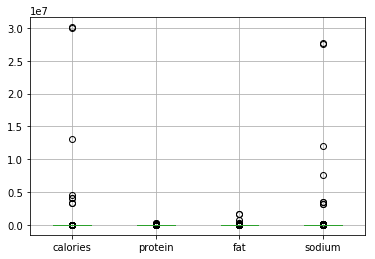

In [13]:
raw_data.boxplot(column = ['calories', 'protein', 'fat', 'sodium'] )
plt.show()

In [14]:
# Extract the 4 columns to analyze in detail:
raw_data4 = raw_data[['calories','protein','fat','sodium']]

In [15]:
raw_data4[['calories','protein','fat','sodium']].describe()

,calories,protein,fat,sodium
count,15935.0,15890.0,15869.0,15933.0
mean,6323.0,100.2,346.9,6226.0
std,359046.0,3840.3,20456.1,333318.2
min,0.0,0.0,0.0,0.0
25%,198.0,3.0,7.0,80.0
50%,331.0,8.0,17.0,294.0
75%,586.0,27.0,33.0,711.0
max,30111218.0,236489.0,1722763.0,27675110.0


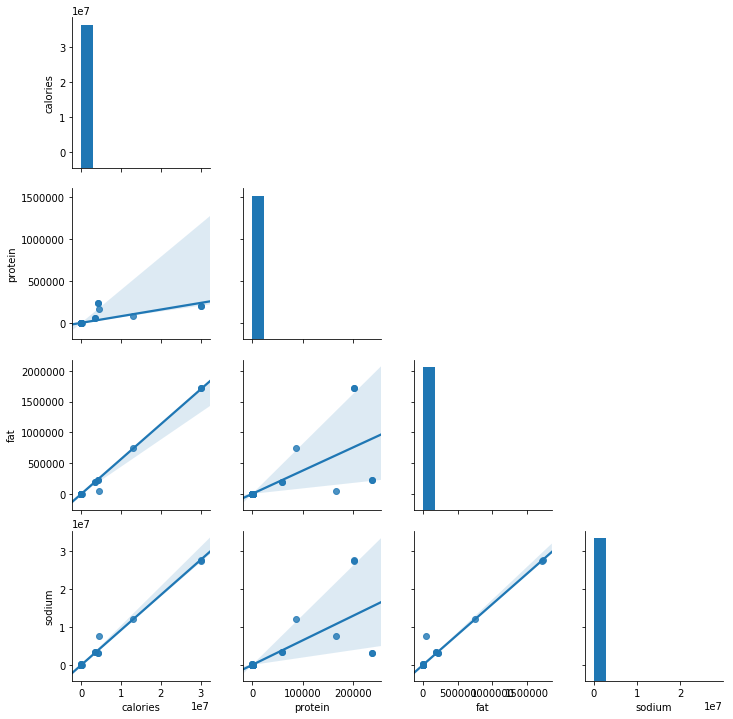

In [16]:
# Basic correlogram
g = sns.pairplot(raw_data4.fillna(0) , kind = 'reg' )
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()


In [17]:
# Display few rows that have at least one `nan` value:
raw_data[raw_data.isnull().any(axis=1)].head(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
3,Mahi-Mahi in Tomato Olive Sauce,5.0,nan,nan,nan,nan,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.4,nan,nan,nan,nan,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# How many rows that have no `nan` value:
raw_data_nonull=raw_data[['calories','protein','fat','sodium']][raw_data.notnull().all(axis=1)]
raw_data_nonull

,calories,protein,fat,sodium
0,426.0,30.0,7.0,559.0
1,403.0,18.0,23.0,1439.0
2,165.0,6.0,7.0,165.0
4,547.0,20.0,32.0,452.0
5,948.0,19.0,79.0,1042.0
8,170.0,7.0,10.0,1272.0
9,602.0,23.0,41.0,1696.0
10,256.0,4.0,5.0,30.0
12,766.0,12.0,48.0,439.0
13,174.0,11.0,12.0,176.0


![title](boxplot_outliers.png)

In [19]:
# The `calories` without any `nan`s:
#cal_clean = raw_data.loc[raw_data['calories'].notnull()]
#
#q1  = cal_clean['calories'].quantile(.25)
#q3  = cal_clean['calories'].quantile(.75)


In [20]:
# Get the q1&q3 quantiles for each of the 4 columns:

q1 = .25 #lower
q3 = .75 #higher
iqr = q3 - q1
quant_df = raw_data_nonull.quantile([q1, q3])
quant_df

,calories,protein,fat,sodium
0.2,199.0,3.0,7.0,82.0
0.8,587.2,27.0,33.0,713.0


In [21]:
# iqr for each column:
iqr_df = quant_df.diff().fillna(0).iloc[1:]
iqr_df.reset_index(drop=True, inplace=True)
iqr_df

,calories,protein,fat,sodium
0,388.2,24.0,26.0,631.0


In [22]:
raw_data_nonull.head()

,calories,protein,fat,sodium
0,426.0,30.0,7.0,559.0
1,403.0,18.0,23.0,1439.0
2,165.0,6.0,7.0,165.0
4,547.0,20.0,32.0,452.0
5,948.0,19.0,79.0,1042.0


In [23]:
# What is the MEAN of each column for the elements that are between `iqr`? The MEAN will replace the `nan`'s values!

raw_data4.apply(lambda x:
                            x.loc[
                                    (x > quant_df.loc[q1,x.name] ) #True if value > q1
                                 &  (x < quant_df.loc[q3,x.name]) #True if value < q3
                               ].mean() # Do the mean for data that is in between `iqr`
                               
                , axis=0 #down the column
                
               )

calories   355.0
protein     10.6
fat         18.1
sodium     325.9
dtype: float64

In [24]:
raw_data4 = raw_data4.apply(lambda x: x.fillna( #Fill `nan` with the mean of the data from `iqr`
                            x.loc[
                                    (x > quant_df.loc[q1,x.name] ) #True if value > q1
                                 &  (x < quant_df.loc[q3,x.name]) #True if value < q3
                               ].mean() # Do the mean for data that is in between `iqr`
                                )
                , axis=0 #down the column
                
               )
raw_data4
# Index 20042 had only `nan`:

,calories,protein,fat,sodium
0,426.0,30.0,7.0,559.0
1,403.0,18.0,23.0,1439.0
2,165.0,6.0,7.0,165.0
3,355.0,10.6,18.1,325.9
4,547.0,20.0,32.0,452.0
5,948.0,19.0,79.0,1042.0
6,355.0,10.6,18.1,325.9
7,355.0,10.6,18.1,325.9
8,170.0,7.0,10.0,1272.0
9,602.0,23.0,41.0,1696.0


In [25]:
raw_data4.describe()

,calories,protein,fat,sodium
count,20052.0,20052.0,20052.0,20052.0
mean,5097.6,81.6,278.3,5014.0
std,320078.8,3418.8,18198.2,297125.6
min,0.0,0.0,0.0,0.0
25%,229.0,4.0,10.0,123.0
50%,355.0,10.6,18.1,325.9
75%,502.0,19.0,28.0,571.0
max,30111218.0,236489.0,1722763.0,27675110.0


In [26]:
print('\niqr:\n',iqr_df)

print('\niqr*3:\n',iqr_df*3)


iqr:
    calories  protein  fat  sodium
0     388.2     24.0 26.0   631.0

iqr*3:
    calories  protein  fat  sodium
0    1164.8     72.0 78.0  1893.0


In [27]:
# Remove the data that is outside the interval [ q1-iqr*3 , q3+iqr*3 ] which are deemed as extreme outliers:
raw_data4_iqr = raw_data4.apply(lambda x: 
                            x.loc[
                                 (x > quant_df.loc[q1,x.name] - iqr_df.loc[0,x.name]*3)
                                 &
                                (x < quant_df.loc[q3,x.name] + iqr_df.loc[0,x.name]*3)
                            ]
                                
                , axis=0 #down the column
                
               )

raw_data4_iqr


,calories,protein,fat,sodium
0,426.0,30.0,7.0,559.0
1,403.0,18.0,23.0,1439.0
2,165.0,6.0,7.0,165.0
3,355.0,10.6,18.1,325.9
4,547.0,20.0,32.0,452.0
5,948.0,19.0,79.0,1042.0
6,355.0,10.6,18.1,325.9
7,355.0,10.6,18.1,325.9
8,170.0,7.0,10.0,1272.0
9,602.0,23.0,41.0,1696.0


In [28]:
raw_data4_iqr = raw_data4_iqr.loc[raw_data4_iqr.notnull().all(axis=1)]
raw_data4_iqr

,calories,protein,fat,sodium
0,426.0,30.0,7.0,559.0
1,403.0,18.0,23.0,1439.0
2,165.0,6.0,7.0,165.0
3,355.0,10.6,18.1,325.9
4,547.0,20.0,32.0,452.0
5,948.0,19.0,79.0,1042.0
6,355.0,10.6,18.1,325.9
7,355.0,10.6,18.1,325.9
8,170.0,7.0,10.0,1272.0
9,602.0,23.0,41.0,1696.0


In [29]:
raw_data4_iqr.describe()

,calories,protein,fat,sodium
count,18988.0,18988.0,18988.0,18988.0
mean,382.4,14.2,20.8,405.5
std,247.7,16.2,17.8,429.6
min,0.0,0.0,0.0,0.0
25%,223.0,4.0,10.0,112.0
50%,355.0,10.6,18.1,325.9
75%,458.0,15.0,25.0,483.0
max,1750.0,98.0,110.0,2591.0


### The Std and Mean decreased significantly.

Also the maximum values are much lower now.

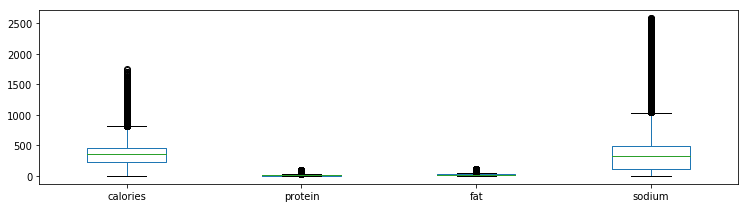

In [30]:
fig = raw_data4_iqr.boxplot(                 
                 figsize=(7,2),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

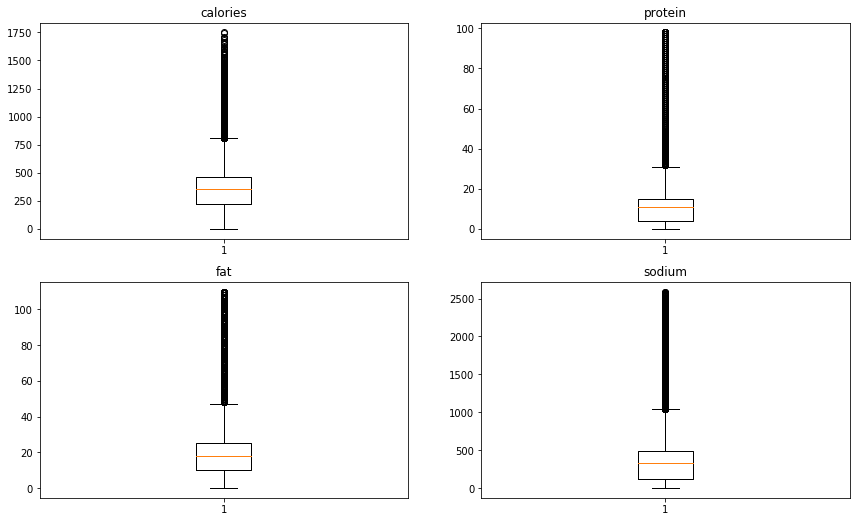

In [31]:
fig, axs = plt.subplots(2, 2)
#figsize=(7,9)
fig.subplots_adjust(left=0.075, right=1.95, top=1.9, bottom=0.25)
# calories plot
axs[0, 0].boxplot(raw_data4_iqr['calories'] )
axs[0, 0].set_title('calories')

# protein plot
axs[0, 1].boxplot(raw_data4_iqr['protein'] )
axs[0, 1].set_title('protein')

# fat plot
axs[1, 0].boxplot(raw_data4_iqr['fat'] )
axs[1, 0].set_title('fat')

# sodium plot
axs[1, 1].boxplot(raw_data4_iqr['sodium'] )
axs[1, 1].set_title('sodium')
plt.show()

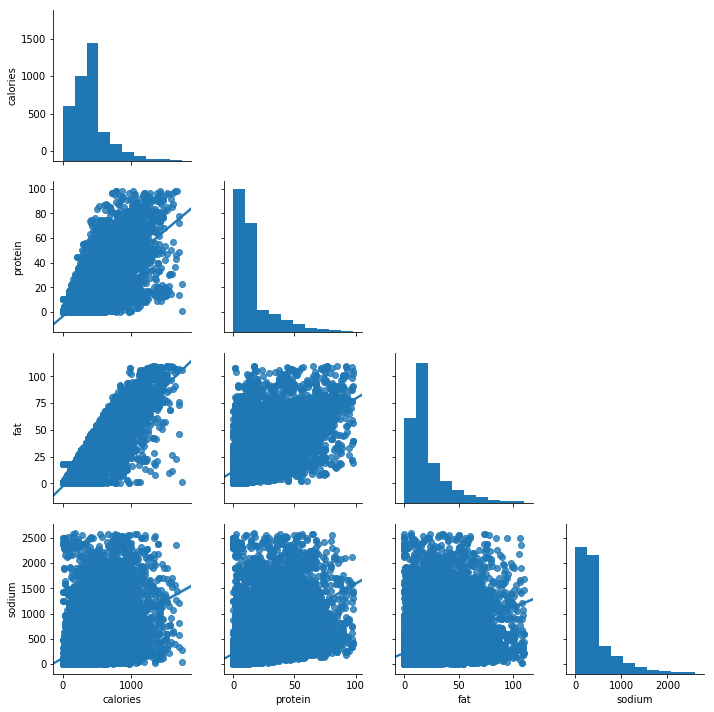

In [32]:
# Basic correlogram
g = sns.pairplot(raw_data4_iqr.fillna(0) , kind = 'reg' )
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()


In [33]:
raw_data4_iqr

,calories,protein,fat,sodium
0,426.0,30.0,7.0,559.0
1,403.0,18.0,23.0,1439.0
2,165.0,6.0,7.0,165.0
3,355.0,10.6,18.1,325.9
4,547.0,20.0,32.0,452.0
5,948.0,19.0,79.0,1042.0
6,355.0,10.6,18.1,325.9
7,355.0,10.6,18.1,325.9
8,170.0,7.0,10.0,1272.0
9,602.0,23.0,41.0,1696.0


In [34]:
# Standardize the 4 columns. The others are all categorical ones!!!
from sklearn import preprocessing

names = raw_data4_iqr.columns
pd.options.display.float_format = "{:.2f}".format 

# standardize the data attributes using `scale` method:
# v1:pd.DataFrame(preprocessing.scale(raw_data4_iqr ) , columns=names ) #the `scale` already includes fit_transform

# v2:
scaler = preprocessing.StandardScaler()

raw_data4_iqr_std = pd.DataFrame(scaler.fit_transform(raw_data4_iqr), columns=names )
raw_data4_iqr_std.head()

,calories,protein,fat,sodium
0,0.18,0.97,-0.77,0.36
1,0.08,0.23,0.13,2.41
2,-0.88,-0.51,-0.77,-0.56
3,-0.11,-0.22,-0.15,-0.19
4,0.66,0.36,0.63,0.11


In [35]:
raw_data4_iqr_std.shape

(18988, 4)

In [36]:
raw_data_less4 = raw_data.drop(raw_data[['calories','protein','fat','sodium']], axis=1)

In [37]:
# Merge data on index. default inner join
raw_data_processed = pd.merge(raw_data4_iqr_std , raw_data_less4 , left_index=True, right_index=True )

In [38]:
raw_data_processed.reset_index()

,index,calories,protein,fat,sodium,title,rating,#cakeweek,#wasteless,22-minute meals,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,0,0.18,0.97,-0.77,0.36,"Lentil, Apple, and Turkey Wrap",2.50,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,1,0.08,0.23,0.13,2.41,Boudin Blanc Terrine with Red Onion Confit,4.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,-0.88,-0.51,-0.77,-0.56,Potato and Fennel Soup Hodge,3.75,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,-0.11,-0.22,-0.15,-0.19,Mahi-Mahi in Tomato Olive Sauce,5.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,0.66,0.36,0.63,0.11,Spinach Noodle Casserole,3.12,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,5,2.28,0.29,3.28,1.48,The Best Blts,4.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,6,-0.11,-0.22,-0.15,-0.19,Ham and Spring Vegetable Salad with Shallot Vi...,4.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,7,-0.11,-0.22,-0.15,-0.19,Spicy-Sweet Kumquats,3.75,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,8,-0.86,-0.45,-0.61,2.02,Korean Marinated Beef,4.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,9,0.89,0.54,1.14,3.00,Ham Persillade with Mustard Potato Salad and M...,3.75,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
# This removes a column if it has only zeros:
# raw_data_processed.loc[:, (raw_data_processed != 0).any(axis=0)]

### I want to observe how many rows with zeros per column are and try to keep only about 30 from the 684 total columns.

Variant 1: I thought of calculating the percentage of zeros from the maximum number of rows that have zeros(which is also the maximum number of rows here)

Variant 2: (the chosen one as it is more scientifical) Use the concept of variance and try to find those `features` where variance is bigger than a threshold. Everything below should be descarded as the data being uniform is does not bring any valuable information.

# Variant 1 (just food for thought, not to be implemented!)

zero_count_columns = ( raw_data_processed.fillna(0)==0 ).sum(axis=0)
### short peek: # zero_count_columns.sort_values( ascending=True )

zero_count_columns = pd.DataFrame(zero_count_columns , columns=['zeros']).reset_index()

zero_count_columns['zeros'].max()

### Insert a new column with a percentage of zero rows divided by maximum number of rows:
zero_count_columns['percentage'] = (zero_count_columns['zeros']/zero_count_columns['zeros'].max())*100

### short peek: # zero_count_columns.sort_values('percentage', ascending=True).head(50)

### Extract columns with less than 90% zeros. Why 90? I do not have a scientific answer that's why I went with `variant 2`!
### Extract columns with less than 90% zeros:
zero_count_top = zero_count_columns[zero_count_columns['percentage']<=90]

final_columns = zero_count_top['index'].tolist()
final_columns

### Recreate the whole data frame with the filtered rows:
raw_data_33col = raw_data_processed[raw_data_processed.columns.intersection(final_columns)]
raw_data_33col.head()

------------------------

# Variant 2:

Use the concept of variance and try to find those `features` where variance is bigger than a threshold. Everything below should be descarded as the data being uniform is does not bring any valuable information.


In [40]:
from sklearn.feature_selection import VarianceThreshold


In [72]:
# Separate data to be able to apply `VarianceThreshold` to each numerical row:
raw_data_processed_X = raw_data_processed.drop(raw_data_processed[['title','rating']] , axis = 1  )
raw_data_processed_y = raw_data_processed['rating']

In [70]:
selector_var = VarianceThreshold(threshold=0.09) #0.1=10% returns 26 columns
selector_var.fit( raw_data_processed_X, raw_data_processed_y)

VarianceThreshold(threshold=0.09)

In [73]:
raw_data_processed_X = raw_data_processed_X.loc[: , selector_var.get_support()]
raw_data_processed_X.head()

,calories,protein,fat,sodium,bake,bon appétit,dairy free,dessert,dinner,fall,...,side,soy free,sugar conscious,summer,tomato,tree nut free,vegetable,vegetarian,wheat/gluten-free,winter
0,0.18,0.97,-0.77,0.36,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
1,0.08,0.23,0.13,2.41,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,-0.88,-0.51,-0.77,-0.56,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,-0.11,-0.22,-0.15,-0.19,0.00,1.00,1.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
4,0.66,0.36,0.63,0.11,1.00,1.00,0.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00


In [44]:
raw_data_processed_X.shape

(18988, 30)

### Do SVR with cleaned data but without standardization over the 4 main columns:

In [45]:
print(raw_data4_iqr.shape)
raw_data4_iqr.head()

(18988, 4)


,calories,protein,fat,sodium
0,426.00,30.00,7.00,559.00
1,403.00,18.00,23.00,1439.00
2,165.00,6.00,7.00,165.00
3,354.98,10.64,18.11,325.92
4,547.00,20.00,32.00,452.00


In [46]:
# Merge data on index. default inner join
# No standardization:
raw_data_cleaned = pd.merge(raw_data4_iqr , raw_data_less4 , left_index=True, right_index=True )
raw_data_cleaned

,calories,protein,fat,sodium,title,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,426.00,30.00,7.00,559.00,"Lentil, Apple, and Turkey Wrap",2.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,403.00,18.00,23.00,1439.00,Boudin Blanc Terrine with Red Onion Confit,4.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,165.00,6.00,7.00,165.00,Potato and Fennel Soup Hodge,3.75,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,354.98,10.64,18.11,325.92,Mahi-Mahi in Tomato Olive Sauce,5.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,547.00,20.00,32.00,452.00,Spinach Noodle Casserole,3.12,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,948.00,19.00,79.00,1042.00,The Best Blts,4.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,354.98,10.64,18.11,325.92,Ham and Spring Vegetable Salad with Shallot Vi...,4.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,354.98,10.64,18.11,325.92,Spicy-Sweet Kumquats,3.75,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,170.00,7.00,10.00,1272.00,Korean Marinated Beef,4.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,602.00,23.00,41.00,1696.00,Ham Persillade with Mustard Potato Salad and M...,3.75,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [47]:
raw_data_cleaned_X = raw_data_cleaned.drop(['rating','title'] , axis=1)
raw_data_cleaned_y = raw_data_cleaned['rating']

In [48]:
selector_var2 = VarianceThreshold(threshold=0.09) #0.1=10% returns 26 columns
selector_var2.fit( raw_data_cleaned_X, raw_data_cleaned_y)
raw_data_cleaned_X = raw_data_cleaned_X.loc[: , selector_var2.get_support()]
raw_data_cleaned_X.head()

,calories,protein,fat,sodium,bake,bon appétit,dairy free,dessert,dinner,fall,...,side,soy free,sugar conscious,summer,tomato,tree nut free,vegetable,vegetarian,wheat/gluten-free,winter
0,426.00,30.00,7.00,559.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
1,403.00,18.00,23.00,1439.00,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,165.00,6.00,7.00,165.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,354.98,10.64,18.11,325.92,0.00,1.00,1.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
4,547.00,20.00,32.00,452.00,1.00,1.00,0.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00


In [49]:
raw_data_cleaned_X.shape

(18988, 31)

In [50]:
from sklearn.svm import SVR
svr = SVR()
X30 = raw_data_cleaned_X
Y30 = raw_data_cleaned_y
svr.fit( X30,Y30 )

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
Y30.shape

(18988,)

In [52]:
svr.score( X30,Y30 )

0.3737645340116952

In [53]:
from sklearn.model_selection import cross_val_score
import time
start_time = time.time()

print( cross_val_score(svr, X30,Y30 , cv=5) )

print("\n--- %s seconds ---" % (time.time() - start_time))


[0.04393446 0.04214789 0.05809468 0.02601632 0.03911424]

--- 270.1012370586395 seconds ---


There is a small improvement but still more work to be done!

### SVR with standardized data:

In [159]:
from sklearn.svm import SVR
svr_30std = SVR()

X30_std4 = raw_data_processed_X
Y30_std4 = raw_data_processed_y #='rating
svr_30std4.fit( X30_std4 , Y30_std4 )

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [160]:
start_time = time.time()

print(svr_30std4.score( X30_std4 , Y30_std4 ))

print("\n--- %s seconds ---" % (time.time() - start_time))

0.11955863892301555

In [161]:
from sklearn.model_selection import cross_val_score

start_time = time.time()

print(cross_val_score(svr_30std4, X30_std4 , Y33_std , cv=5))

print("\n--- %s seconds ---" % (time.time() - start_time))

array([0.05572084, 0.03594039, 0.05229911, 0.03233457, 0.04563369])

Even with standardized data, the score is not better.

## We can take our regression problem and turn it into a classifier.

In [56]:
print('shape of df:',raw_data_processed_X.shape)
raw_data_processed_X.head()

shape of df: (18988, 30)


,calories,protein,fat,sodium,bake,bon appétit,dairy free,dessert,dinner,fall,...,side,soy free,sugar conscious,summer,tomato,tree nut free,vegetable,vegetarian,wheat/gluten-free,winter
0,0.18,0.97,-0.77,0.36,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
1,0.08,0.23,0.13,2.41,1.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,-0.88,-0.51,-0.77,-0.56,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,-0.11,-0.22,-0.15,-0.19,0.00,1.00,1.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
4,0.66,0.36,0.63,0.11,1.00,1.00,0.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00


In [59]:
# the to-be-predicted column 'rating':
raw_data_processed_y.head()

0   2.50
1   4.38
2   3.75
3   5.00
4   3.12
Name: rating, dtype: float64

In [60]:
raw_data_processed_y.value_counts()

4.38    7571
3.75    4911
5.00    2583
0.00    1752
3.12    1394
2.50     505
1.25     151
1.88     121
Name: rating, dtype: int64

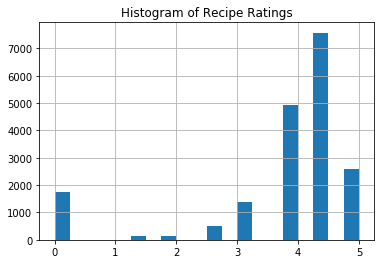

In [61]:
raw_data_processed_y.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [62]:
pd.options.mode.chained_assignment = None  # default='warn'
# The SettingWithCopyWarning was created to flag potentially confusing "chained" assignments, such as the following,
# which don't always work as expected, particularly when the first selection returns a copy. 

# or: You can set the is_copy flag to False, which will effectively turn off the check, *for that object``
# dfa.is_copy = False

In [201]:
#cols = raw_data_33col.columns.drop(['title'])
# Convert to numeric
#raw_data_33col[cols] = raw_data_33col[cols].apply(pd.to_numeric, errors='coerce')

In [74]:
raw_data_processed_X.dtypes

calories             float64
protein              float64
fat                  float64
sodium               float64
bake                 float64
bon appétit          float64
dairy free           float64
dessert              float64
dinner               float64
fall                 float64
gourmet              float64
healthy              float64
kidney friendly      float64
kosher               float64
no sugar added       float64
onion                float64
peanut free          float64
pescatarian          float64
quick & easy         float64
sauté                float64
side                 float64
soy free             float64
sugar conscious      float64
summer               float64
tomato               float64
tree nut free        float64
vegetable            float64
vegetarian           float64
wheat/gluten-free    float64
winter               float64
dtype: object

## SVC classifier:

Before running the SVC we have to transform the 'rating' column to a categorical type.

We'll look at the boxplot to see what kind of condition to use when splitting the data into 'high' or 'low' rating

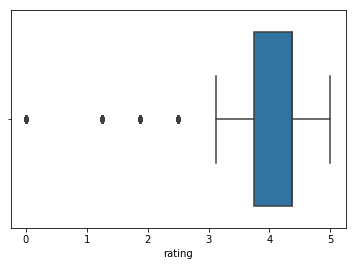

In [76]:
sns.boxplot(raw_data_processed_y)
plt.show()

In [82]:
print('the median is:',raw_data_processed_y.median())
raw_data_processed_y.describe()

the median is: 4.375


count   18988.00
mean        3.71
std         1.34
min         0.00
25%         3.75
50%         4.38
75%         4.38
max         5.00
Name: rating, dtype: float64

We are going to use the median as our splitting point b/c most of our values are around that point. 

As the data still has outliers it is not wise to use the `mean`!

In [83]:
from sklearn.svm import SVC
clsf = SVC()

X_clsf = raw_data_processed_X
Y_clsf = np.where(raw_data_processed_y >= 4.37, 'high', 'low')


In [84]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split( X_clsf, Y_clsf , test_size=0.3, random_state=20)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13291, 30) (13291,)
(5697, 30) (5697,)


In [85]:
# We then train our model on our training data set.
clsf.fit( X_train , y_train )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

C is the penalty parameter for the error – A low C value gives a smoother, more generalised decision boundary (high bias) and as you increase C, you increase the variance in your classifier.

Gamma is inversely proportional to the range of the effect of a single training sample – if it is low, the sample will have far-reaching effects, but if it is high the sample will have localised effects only.

In [89]:
# clsf.score( X_test , y_test )

In [86]:
from sklearn.metrics import accuracy_score

start_time = time.time()

y_predict = clsf.predict(X_test)
score = accuracy_score(y_test, y_predict)
print('accuracy score:',score)

print("\n--- %s seconds ---" % (time.time() - start_time))

accuracy score: 0.5595927681235738

--- 2.15786075592041 seconds ---


In [87]:
# Predicting the test set results:
y_predict = clsf.predict( X_test )
y_predict

array(['high', 'low', 'high', ..., 'low', 'high', 'high'], dtype='<U4')

In [88]:

from sklearn.model_selection import cross_val_score
cross_val_score( clsf , X_clsf , Y_clsf , cv=5)


array([0.56924697, 0.56134808, 0.56661401, 0.57846235, 0.56612223])

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y_test , y_predict  )

array([[2232,  784],
       [1725,  956]], dtype=int64)

In [91]:
print('\n Accuracy by `rating` (Confusion matrix):\n')
print(pd.crosstab( y_test , y_predict , rownames=['Actual'], colnames=['Predicted']
                    , margins=True
                 )
     )


 Accuracy by `rating` (Confusion matrix):

Predicted  high   low   All
Actual                     
high       2232   784  3016
low        1725   956  2681
All        3957  1740  5697


Thus in binary classification C_{i,j}, the count of 
- true negatives is C_{0,0}  --> (it was predicted 0 (j) and discovered to be 0 (i)), 
- false negatives is C_{1,0} --> (it was predicted 0 (j) and discovered to be 1 (i)),
- true positives is C_{1,1}  --> (it was predicted 1 (j) and discovered to be 1 (i)), 
- false positives is C_{0,1} --> (it was predicted 1 (j) and discovered to be 0 (i)),
    
    
      |0   1| <--predicted
    0 |tn fp|
    1 |fn tp|
    ^
    |
    actual

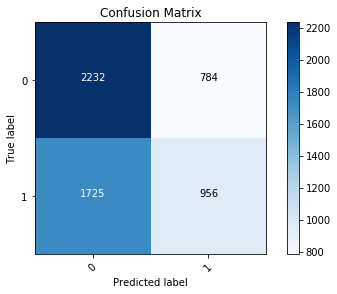

In [92]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

classes = range(2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The score from SVC is way better than SVR. But still there are a lot of missing predictions

## Feature Extraction: SelectKbest

SelectKBest selects the top $k$ features that have maximum relevance with the target variable (they explain most of the variance). 

In [93]:
from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.feature_selection import f_regression 

f_classif: ANOVA F-value between label/feature for classification tasks.

chi2 : is also good for classification tasks.

In [94]:
# feature extraction
svc_kbest = SelectKBest(score_func=f_classif, k = 5)

#Fitting finds the internal parameters of a model that will be used to transform data. 
# To center the data (make it have zero mean and unit standard error)
# , you subtract the mean and then divide the result by the standard deviation.
fitted = svc_kbest.fit(X_train, y_train)
fitted

SelectKBest(k=5, score_func=<function f_classif at 0x000001870300D8C8>)

In [95]:
#Transforming applies the parameters to data. You may fit a model to one set of data, and then 
#transform it on a completely different set.
features = fitted.transform(X_test)
print('2 examples: ',features[:2])
print('number of examples:',len(features))

2 examples:  [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
number of examples: 5697


In [96]:
# summarize scores
np.set_printoptions(precision=2)
print(fitted.scores_[:100])

[7.64e-02 9.03e-01 1.57e-01 1.47e-01 1.22e+01 1.53e+02 4.77e-04 1.48e+01
 6.50e+01 3.55e+01 2.70e+01 1.18e+00 7.14e+00 9.91e+00 1.57e+00 5.71e+00
 6.30e+01 1.17e+01 2.07e+01 5.77e-01 2.63e+00 6.25e+01 5.51e+00 2.43e+00
 1.71e+00 3.02e+01 6.94e+00 1.09e+00 4.36e+00 5.69e-01]


In [102]:
svc_kbest.get_support()
np.array(X_clsf.columns)[svc_kbest.get_support()]

array(['bon appétit', 'dinner', 'fall', 'peanut free', 'soy free'],
      dtype=object)

In [103]:
svc_kbest.get_support(indices=True)

array([ 5,  8,  9, 16, 21], dtype=int64)

In [109]:
names = raw_data_processed_X.columns
names

Index(['calories', 'protein', 'fat', 'sodium', 'bake', 'bon appétit',
       'dairy free', 'dessert', 'dinner', 'fall', 'gourmet', 'healthy',
       'kidney friendly', 'kosher', 'no sugar added', 'onion', 'peanut free',
       'pescatarian', 'quick & easy', 'sauté', 'side', 'soy free',
       'sugar conscious', 'summer', 'tomato', 'tree nut free', 'vegetable',
       'vegetarian', 'wheat/gluten-free', 'winter'],
      dtype='object')

In [110]:
[names[i] for i in svc_kbest.get_support(indices=True)]



['bon appétit', 'dinner', 'fall', 'peanut free', 'soy free']

In [112]:
selected_feature_names = [names[i] for i in svc_kbest.get_support(indices=True)]
selected_feature_names

feat_names = []
feat_scores = []
feat_pval = []

for n in range(0, len(selected_feature_names)):
    #lr_kbest = SelectKBest(score_func=f_classif, k=10)
    #fitted = lr_kbest.fit(X_train, y_train)    
    #print(" %s : %.2f"  % (selected_feature_names[n],fitted.scores_[n]))
    
    feat_names.append(selected_feature_names[n])
    feat_scores.append(fitted.scores_[n])
    feat_pval.append(fitted.pvalues_[n])

# Create a data frame for a better way of visualization:    
feature_scoring = pd.DataFrame({
        'feature': feat_names,
        'score': feat_scores,
        'p_value':feat_pval
    })
# scores are better if greater, p-values are better if smaller (and losses are better if smaller)
feature_scoring.sort_values('score' , ascending = False).reset_index()

,index,feature,p_value,score
0,4,soy free,0.00,12.17
1,1,dinner,0.34,0.90
2,2,fall,0.69,0.16
3,3,peanut free,0.70,0.15
4,0,bon appétit,0.78,0.08


SelectKBest <u>defaults</u> to scoring parameters using the ANOVA F-value which is a measure of variation between sample means. 

It describes how much of the variance between labels is explained by a particular feature. A higher value therefore means that there is more variation in that feature between person of interests and non persons of interest.

### Evaluate the model with selectKbest features:

In [113]:
X_train[feat_names].reset_index(drop=True).head()

,bon appétit,dinner,fall,peanut free,soy free
0,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,1.00,0.00,0.00


In [114]:
# Fit the model.
clsf.fit( X_train[feat_names], y_train )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(clsf.score(X_test[feat_names], y_test)))

Accuracy of Support Vector Machine classifier on test set: 0.54


In [116]:

import time
start_time = time.time()

results_kbest = cross_val_score( clsf , X_train[feat_names] , y_train , cv= 5 )
print(results_kbest)

print("10-fold cross validation average accuracy for SelectKBest: %.3f" % (results_kbest.mean()))

print("\n--- %s seconds ---" % (time.time() - start_time))

[0.58 0.57 0.58 0.56 0.55]
10-fold cross validation average accuracy for SelectKBest: 0.567

--- 12.774014949798584 seconds ---


# :(

### Hyperparameter tunning: GridSearchCV

In [119]:

from sklearn.model_selection import GridSearchCV
def svc_param_selection( X_train , y_train , nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    #gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs
                  #, 'gamma' : gammas
                 }
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit( X_train , y_train )
    grid_search.best_params_
    return grid_search.best_params_

In [120]:
svc_param_selection (X_train , y_train , 5)

{'C': 10}

### ...this is the result after about 30mins of running

In [121]:
clsf_gridded = SVC( C= 10
                  # , gamma= 0.1 
                  )

In [122]:
# We then train our model on our training data set.
clsf_gridded.fit( X_train , y_train )

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
# Predicting the test set results:
y_predict = clsf_gridded.predict( X_test )
y_predict

array(['high', 'low', 'high', ..., 'low', 'high', 'high'], dtype='<U4')

In [124]:
from sklearn.metrics import accuracy_score

start_time = time.time()

y_predict = clsf_gridded.predict(X_test)
score = accuracy_score(y_test, y_predict)
print('accuracy_score: ',score)

print("\n--- %s seconds ---" % (time.time() - start_time))

accuracy_score:  0.5666140073723012

--- 2.0916507244110107 seconds ---


In [125]:

from sklearn.model_selection import cross_val_score


start_time = time.time()


print(cross_val_score( clsf_gridded , X_clsf , Y_clsf , cv=5))


print("\n--- %s seconds ---" % (time.time() - start_time))

[0.58 0.56 0.57 0.57 0.57]

--- 67.4553427696228 seconds ---


#### A very very small improvement with SelectKBest and GridSearchCV... what else to try?


In [ ]:
.